In [13]:
from scipy.io import arff
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np

# Load the OBS-Network-DataSet_2_Aug27 file
data, meta = arff.loadarff('OBS-Network-DataSet_2_Aug27.arff')

# Convert data to pandas DataFrame
data = pd.DataFrame(data)

# Display the DataFrame
print(data.head())

   Node  Utilised Bandwith Rate  Packet Drop Rate  Full_Bandwidth  \
0   3.0                0.822038          0.190381          1000.0   
1   9.0                0.275513          0.729111           100.0   
2   3.0                0.923707          0.090383           900.0   
3   9.0                0.368775          0.637710           100.0   
4   3.0                0.905217          0.108670           800.0   

   Average_Delay_Time_Per_Sec  Percentage_Of_Lost_Pcaket_Rate  \
0                    0.004815                       19.031487   
1                    0.004815                       72.889036   
2                    0.000633                        9.035834   
3                    0.000552                       63.737843   
4                    0.000497                       10.864208   

   Percentage_Of_Lost_Byte_Rate  Packet Received  Rate  of Used_Bandwidth  \
0                     19.038129               0.809619          822.03750   
1                     72.911141         

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1075 entries, 0 to 1074
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Node                            1075 non-null   float64
 1   Utilised Bandwith Rate          1075 non-null   float64
 2   Packet Drop Rate                1075 non-null   float64
 3   Full_Bandwidth                  1075 non-null   float64
 4   Average_Delay_Time_Per_Sec      1075 non-null   float64
 5   Percentage_Of_Lost_Pcaket_Rate  1075 non-null   float64
 6   Percentage_Of_Lost_Byte_Rate    1075 non-null   float64
 7   Packet Received  Rate           1075 non-null   float64
 8   of Used_Bandwidth               1075 non-null   float64
 9   Lost_Bandwidth                  1075 non-null   float64
 10  Packet Size_Byte                1075 non-null   float64
 11  Packet_Transmitted              1075 non-null   float64
 12  Packet_Received                 10

In [15]:
# Handle missing values
data.dropna(inplace=True)  # Drop rows with missing values

In [16]:
# Encode categorical variables
data = pd.get_dummies(data, columns=['Node Status'])

In [17]:
# Select numerical columns
numerical_cols = data.select_dtypes(include=['float64']).columns

# Scale numerical features
scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

# Final scaled dataset
print(data.head())


       Node  Utilised Bandwith Rate  Packet Drop Rate  Full_Bandwidth  \
0 -1.009479                1.203808         -1.207882        1.595133   
1  0.990610               -1.757009          1.762096       -1.536054   
2 -1.009479                1.754604         -1.759164        1.247223   
3  0.990610               -1.251759          1.258209       -1.536054   
4 -1.009479                1.654433         -1.658349        0.899313   

   Average_Delay_Time_Per_Sec  Percentage_Of_Lost_Pcaket_Rate  \
0                    4.051933                       -1.208468   
1                    4.051933                        1.757715   
2                   -0.319842                       -1.758974   
3                   -0.404517                        1.253716   
4                   -0.462013                       -1.658278   

   Percentage_Of_Lost_Byte_Rate  Packet Received  Rate  of Used_Bandwidth  \
0                     -1.208093               1.208112           2.094188   
1               

In [18]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data = data[data.columns[:]].apply(le.fit_transform)

In [19]:
data.head()

,Node,Utilised Bandwith Rate,Packet Drop Rate,Full_Bandwidth,Average_Delay_Time_Per_Sec,Percentage_Of_Lost_Pcaket_Rate,Percentage_Of_Lost_Byte_Rate,Packet Received Rate,of Used_Bandwidth,Lost_Bandwidth,...,Transmitted_Byte,Received_Byte,10-Run-AVG-Drop-Rate,10-Run-AVG-Bandwith-Use,10-Run-Delay,Flood Status,Class,Node Status_b'B',Node Status_b'NB',Node Status_b'P NB'
0,0,171,24,9,153,24,24,172,192,98,...,9,190,32,170,171,24,1,1,0,0
1,1,9,187,0,153,187,187,9,0,38,...,0,0,194,9,176,175,0,0,1,0
2,0,195,1,8,70,1,1,195,193,34,...,8,191,0,205,168,0,3,1,0,0
3,1,26,171,0,58,171,171,25,2,28,...,0,2,195,27,170,170,0,0,1,0
4,0,191,5,7,47,5,5,191,182,41,...,7,181,3,201,169,0,3,1,0,0


In [32]:
from sklearn.model_selection import train_test_split
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GlobalAveragePooling1D, Dense, Dropout, BatchNormalization


# Define features (X) and target (y)
X = data.drop(columns=['Class'])
y = data['Class']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split the training data into training and validation sets (75% train, 25% validation)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

# Print the shapes of the resulting datasets
print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Test set shape:", X_test.shape, y_test.shape)


Training set shape: (636, 23) (636,)
Validation set shape: (212, 23) (212,)
Test set shape: (212, 23) (212,)


In [39]:
# Reshape input data for CNN
X_train_reshaped = X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1)
X_val_reshaped = X_val.values.reshape(X_val.shape[0], X_val.shape[1], 1)
X_test_reshaped = X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1)

# Define CNN model
cnn_model = Sequential([
    Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])),
    Dropout(0.2),

    Conv1D(filters=128, kernel_size=2, activation='relu'),
    Dropout(0.2),
    BatchNormalization(),

    Conv1D(filters=256, kernel_size=2, activation='relu'),
    Dropout(0.2),
    BatchNormalization(),

    Conv1D(filters=512, kernel_size=2, activation='relu'),
    Dropout(0.2),
    BatchNormalization(),

    GlobalAveragePooling1D(),
    Dense(units=4, activation='softmax')
])

# Compile the model
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = cnn_model.fit(X_train_reshaped, y_train, epochs=100, batch_size=32, validation_data=(X_val_reshaped, y_val))


Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 13s 123ms/step - accuracy: 0.4869 - loss: 1.2006 - val_accuracy: 0.5566 - val_loss: 3.3921
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - accuracy: 0.6624 - loss: 0.8438 - val_accuracy: 0.2123 - val_loss: 3.4016
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - accuracy: 0.6419 - loss: 0.8298 - val_accuracy: 0.2594 - val_loss: 3.0025
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - accuracy: 0.6931 - loss: 0.7152 - val_accuracy: 0.6509 - val_loss: 1.4536
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - accuracy: 0.7068 - loss: 0.6600 - val_accuracy: 0.6179 - val_loss: 1.0955
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - accuracy: 0.7099 - loss: 0.6661 - val_accuracy: 0.5943 - val_loss: 1.2002
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - accuracy: 0.7183 - loss: 0.6796 - val_accuracy: 0.7075 - val_loss: 0.9794
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step - accuracy: 0.6614 - loss: 0.7068 - val_accuracy: 

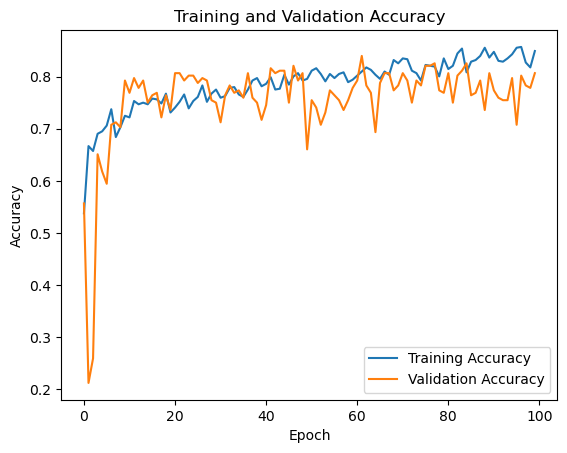

In [40]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

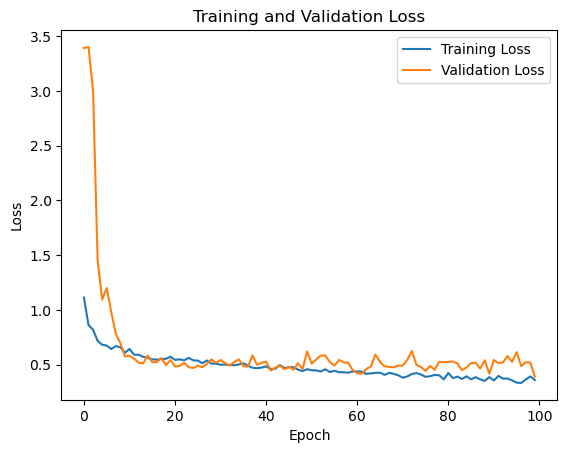

In [41]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [42]:
# Generate predictions
predictions = cnn_model.predict(X_test_reshaped)
predicted_classes = np.argmax(predictions, axis=1)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, predicted_classes))

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.58      0.73        26
           1       0.83      0.89      0.86        99
           2       0.71      0.76      0.73        54
           3       1.00      1.00      1.00        33

    accuracy                           0.83       212
   macro avg       0.88      0.81      0.83       212
weighted avg       0.85      0.83      0.83       212



In [43]:
# Reshape the training, validation, and test sets for RNN
X_train_rnn = np.reshape(X_train.values, (X_train.shape[0], X_train.shape[1], 1))
X_val_rnn = np.reshape(X_val.values, (X_val.shape[0], X_val.shape[1], 1))
X_test_rnn = np.reshape(X_test.values, (X_test.shape[0], X_test.shape[1], 1))

# Print the shapes of the reshaped datasets
print("Training set shape (RNN):", X_train_rnn.shape, y_train.shape)
print("Validation set shape (RNN):", X_val_rnn.shape, y_val.shape)
print("Test set shape (RNN):", X_test_rnn.shape, y_test.shape)

from keras.utils import to_categorical

# One-hot encode the target labels
y_train_encoded = to_categorical(y_train)
y_val_encoded = to_categorical(y_val)
y_test_encoded = to_categorical(y_test)

Training set shape (RNN): (636, 23, 1) (636,)
Validation set shape (RNN): (212, 23, 1) (212,)
Test set shape (RNN): (212, 23, 1) (212,)


In [44]:
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, Dropout
from keras.optimizers import Adam
from keras.layers import LSTM

from keras.optimizers import Adam

# Define the optimizer with the learning rate argument
optimizer = Adam(learning_rate=0.001)

# Define RNN model with additional layers
rnn_model = Sequential([
    SimpleRNN(units=128, activation='relu', input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2]), return_sequences=True),
    Dropout(0.2),  # Add dropout layer
    SimpleRNN(units=128, activation='relu', return_sequences=True),
    Dropout(0.2),  # Add dropout layer
    SimpleRNN(units=128, activation='relu', return_sequences=True),
    Dropout(0.2),  # Add dropout layer
    SimpleRNN(units=128, activation='relu'),  # Last layer does not need return_sequences=True
    Dropout(0.2),  # Add dropout layer
    Dense(units=64, activation='relu'),  # Additional dense layer
    Dropout(0.2),  # Add dropout layer
    Dense(units=4, activation='softmax')  # 4 output classes
])

# Compile the model with the defined optimizer
rnn_model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Print model summary
print(rnn_model.summary())

C:\Users\A S Computer\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 23, 128)        │        16,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_48 (Dropout)            │ (None, 23, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ (None, 23, 128)        │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_49 (Dropout)            │ (None, 23, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_2 (SimpleRNN)        │ (None, 23, 128)        │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_50 (Dropout)            │ (None, 23, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_3 (SimpleRNN)        │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_51 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_52 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 123,844 (483.77 KB)

 Trainable params: 123,844 (483.77 KB)

 Non-trainable params: 0 (0.00 B)

None


In [45]:
from keras.optimizers import Adam

# Define the optimizer with the learning_rate argument
optimizer = Adam(learning_rate=0.001)

# Compile the model with the defined optimizer
rnn_model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Then, train the model with the encoded target labels
history = rnn_model.fit(X_train_rnn, y_train_encoded,
                        epochs=100,
                        batch_size=32,
                        validation_data=(X_val_rnn, y_val_encoded))


Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 20s 144ms/step - accuracy: 0.3295 - loss: 6.7716 - val_accuracy: 0.6085 - val_loss: 0.9972
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.4386 - loss: 1.2863 - val_accuracy: 0.5377 - val_loss: 1.0185
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.4776 - loss: 1.1098 - val_accuracy: 0.6887 - val_loss: 0.8572
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.4561 - loss: 1.1015 - val_accuracy: 0.6462 - val_loss: 0.8116
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.5551 - loss: 0.9542 - val_accuracy: 0.7217 - val_loss: 0.7222
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - accuracy: 0.5537 - loss: 0.9224 - val_accuracy: 0.7500 - val_loss: 0.6508
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - accuracy: 0.5873 - loss: 0.8748 - val_accuracy: 0.7170 - val_loss: 0.6792
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - accuracy: 0.6296 - loss: 0.8354 - val_accuracy: 

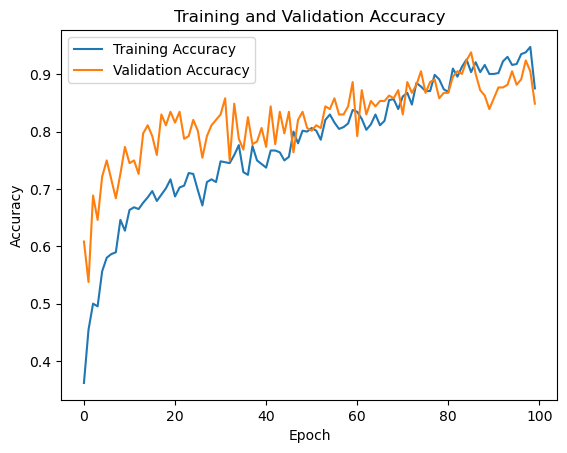

In [46]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

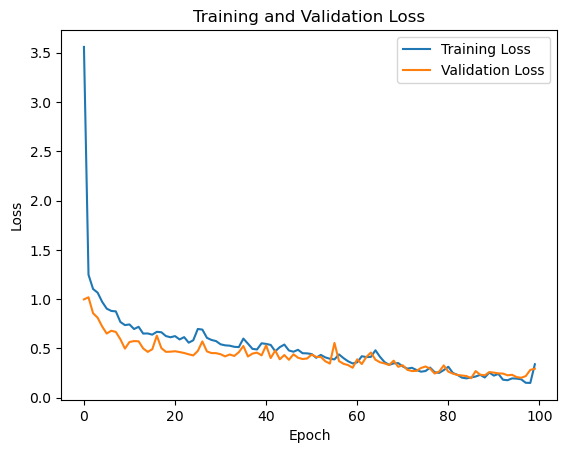

In [47]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [48]:
# Generate predictions
y_pred = rnn_model.predict(X_test_rnn)
y_pred_classes = np.argmax(y_pred, axis=1)

# Print classification report
print(classification_report(y_test, y_pred_classes))

7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 245ms/step
              precision    recall  f1-score   support

           0       1.00      0.85      0.92        26
           1       0.82      0.90      0.86        99
           2       0.76      0.69      0.72        54
           3       1.00      1.00      1.00        33

    accuracy                           0.85       212
   macro avg       0.89      0.86      0.87       212
weighted avg       0.86      0.85      0.85       212



In [50]:
# Serialize model architecture to JSON
model_json = rnn_model.to_json()
with open("rnn_model.json", "w") as json_file:
    json_file.write(model_json)

# Serialize weights to HDF5
rnn_model.save_weights("rnn_model_weights.weights.h5")
